# Load and preprocess data 

In [26]:
import pandas as pd
import numpy as np
# Ausschluss Probanden 1,4,10,18
# load .csv containig all subjects and eda info
df = pd.read_csv('/home/rebekka/Documents/Doktorarbeit/Physio/BekJan/eda_all.csv', header=0)
df.loc[:,('eda_rate per min')].astype(float)


0     6.39
1     7.30
2     6.31
3     9.88
4     5.98
      ... 
64    6.39
65    6.56
66    5.98
67    2.07
68    6.72
Name: eda_rate per min, Length: 69, dtype: float64

In [8]:
print(df)

    Subject Bedingung  eda_rate per min                       Time
0        24     music              6.39   stressI_eda_rate per min
1        17     water              7.30   stressI_eda_rate per min
2        13     water              6.31   stressI_eda_rate per min
3        25     water              9.88   stressI_eda_rate per min
4        16     music              5.98   stressI_eda_rate per min
..      ...       ...               ...                        ...
64       28     music              6.39  stressII_eda_rate per min
65        9     water              6.56  stressII_eda_rate per min
66       11     music              5.98  stressII_eda_rate per min
67       12     water              2.07  stressII_eda_rate per min
68       15     water              6.72  stressII_eda_rate per min

[69 rows x 4 columns]


## Analysis of EDA data

## Test for normal distribution

https://statistikguru.de/spss/mixed-anova/normalverteilung-ueberpruefen-4.html

The independent variable should be normally distributed in each group. If this is the case, results can be interpreted quite easily. If not, there are several studies that verify the conduction of ANOVA even though normally distribution is not met(Glass, Peckham, & Sanders, 1972; Harwell, Rubinstein, Hayes, & Olds, 1992; Salkind, 2010).

In our study, GCS data seperated into two groups showed normal distribution (p>0,05).

Die unabhängige Variable sollte bei einer mixed ANOVA für jede Gruppe und für jede Stufe des Faktors etwa normalverteilt sein. Ist dies der Fall, so lassen sich die Ergebnisse am fehlerfreisten interpretieren. Allerdings gibt es auch genügend Belege aus aktuellen Studien, dass die ANOVA robust gegenüber einer Verletzung der Normalverteilung ist (Glass, Peckham, & Sanders, 1972; Harwell, Rubinstein, Hayes, & Olds, 1992; Salkind, 2010).

Bei den gemessenen EDA-Werten zeigt sich zwischen den Gruppen (Musik vs Wasser) eine Normalverteilung (p>0,05).

In [9]:
# check for a normally distributed sample (normality)
import pingouin as pg
pg.normality(df, group='Bedingung', dv='eda_rate per min')

,W,pval,normal
music,0.978228,0.685307,True
water,0.968560,0.441496,True


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbcc8dea588>]],
      dtype=object)

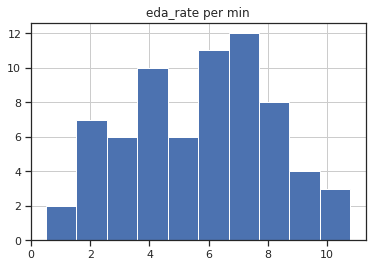

In [10]:
%matplotlib inline
df.hist(column='eda_rate per min')


In [11]:
# create df containig only subjects that listened to water sounds
df_norm_w=df.loc[(df['Bedingung'] == ('water'))]
print(df_norm_w)

    Subject Bedingung  eda_rate per min                       Time
1        17     water              7.30   stressI_eda_rate per min
2        13     water              6.31   stressI_eda_rate per min
3        25     water              9.88   stressI_eda_rate per min
5        20     water              7.97   stressI_eda_rate per min
6        21     water              6.56   stressI_eda_rate per min
9         5     water              9.13   stressI_eda_rate per min
14       22     water              9.13   stressI_eda_rate per min
15        4     water              8.30   stressI_eda_rate per min
19        9     water              7.55   stressI_eda_rate per min
21       12     water              3.82   stressI_eda_rate per min
22       15     water              4.56   stressI_eda_rate per min
24       17     water              3.32  acoustic_eda_rate per min
25       13     water              0.50  acoustic_eda_rate per min
26       25     water              5.15  acoustic_eda_rate per

In [12]:
# create df with subjects that listened to music
df_norm_m=df.loc[(df['Bedingung'] == ('music'))]
print(df_norm_m)

    Subject Bedingung  eda_rate per min                       Time
0        24     music              6.39   stressI_eda_rate per min
4        16     music              5.98   stressI_eda_rate per min
7        23     music              7.39   stressI_eda_rate per min
8         2     music              6.80   stressI_eda_rate per min
10       26     music              3.98   stressI_eda_rate per min
11       14     music              8.46   stressI_eda_rate per min
12       29     music              9.38   stressI_eda_rate per min
13       27     music              4.23   stressI_eda_rate per min
16       19     music              9.88   stressI_eda_rate per min
17        3     music              7.55   stressI_eda_rate per min
18       28     music              5.23   stressI_eda_rate per min
20       11     music              6.64   stressI_eda_rate per min
23       24     music              4.32  acoustic_eda_rate per min
27       16     music              3.82  acoustic_eda_rate per

In [13]:
# test for normality in group with music intervention
import pingouin as pg
pg.normality(df_norm_m, group='Time', dv='eda_rate per min')

,W,pval,normal
stressI_eda_rate per min,0.970165,0.912527,True
acoustic_eda_rate per min,0.895104,0.137137,True
stressII_eda_rate per min,0.944656,0.560619,True


In [14]:
#test for normality in group with water intervention
import pingouin as pg
pg.normality(df_norm_w, group='Time', dv='eda_rate per min')

,W,pval,normal
stressI_eda_rate per min,0.947874,0.616921,True
acoustic_eda_rate per min,0.907854,0.229981,True
stressII_eda_rate per min,0.965919,0.842622,True


## Test for homoscedasticity

There was homogeneity of the error variances, as assessed by Levene’s test (p > .05).

Homogenität der Varianzen lag vor. 

Homogenität der Fehlervarianzen der einzelnen Gruppen war gemäß dem Levene-Test für alle Variablen erfüllt (p > .05).

In [15]:
pg.homoscedasticity(df, group='Time', dv='eda_rate per min')

,W,pval,equal_var
levene,0.312,0.733354,True


In [16]:
# check for equal variances (homoscedasticity)
pg.homoscedasticity(df_norm_w, group='Time', dv='eda_rate per min')

,W,pval,equal_var
levene,0.182,0.834771,True


In [17]:
# check for equal variances (homoscedasticity)
pg.homoscedasticity(df_norm_m, group='Time', dv='eda_rate per min')

,W,pval,equal_var
levene,1.02,0.371649,True


## Test for sphericity

Sphericity was met.

Sphärizität liegt vor.

In [18]:
pg.sphericity(df, subject='Subject', dv='eda_rate per min', within='Time')

(True, 0.951, 1.066, 2, 0.586815860107314)

## Descriptive statistics

[]

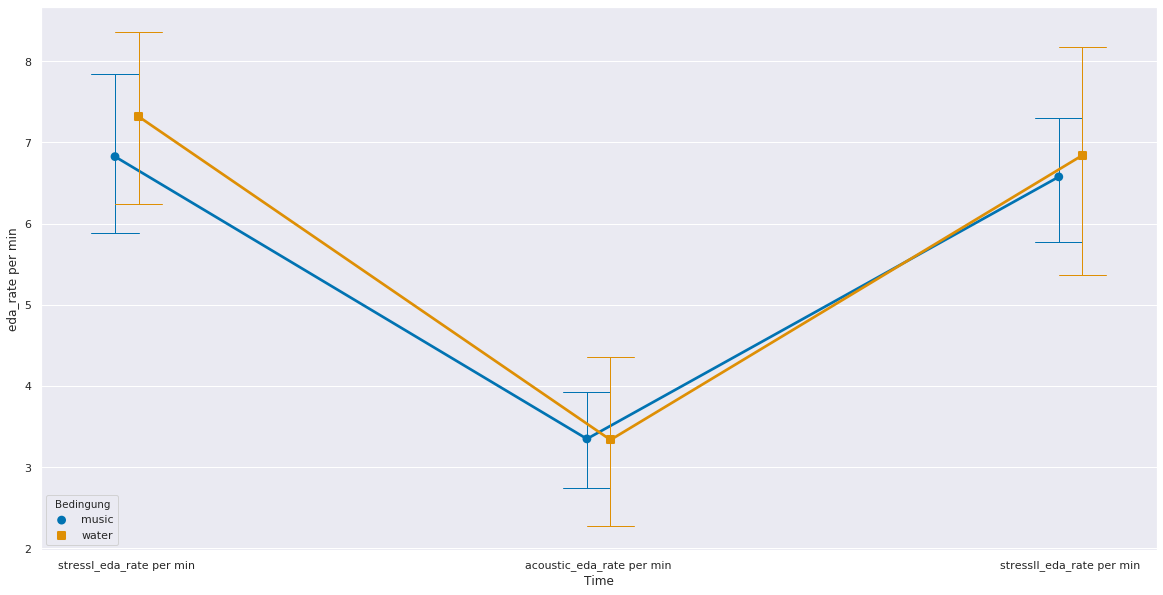

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,10))
sns.set()
sns.pointplot(data=df, x='Time', y='eda_rate per min', hue='Bedingung', dodge=True, markers=['o', 's'], capsize=.1, errwidth=1, palette='colorblind')
plt.plot()

In [20]:
df.groupby(['Time', 'Bedingung'])['eda_rate per min'].agg(['mean', 'std']).round(2)

mean   std
Time                      Bedingung            
acoustic_eda_rate per min music      3.35  1.13
                          water      3.34  1.92
stressII_eda_rate per min music      6.58  1.50
                          water      6.84  2.44
stressI_eda_rate per min  music      6.83  1.85
                          water      7.32  1.90

# Conduct a mixed (split-plot) ANOVA 

There was no statistically significant interaction between time and group, punc = 0,801, eps0,953.

Es gab keine statistisch signifikante Interaktion zwischen der Zeit und den Untersuchungsgruppen (punc = 0,801, eps0,953) .



In [21]:
# https://raphaelvallat.com/pingouin.html
#  dv:  A dependent variable: Cortisol
#  within: A within-group variable, Time
#  between:  A between-group variable, Group, with two levels (music, water)
#  subject:  A subject variable, Subject

# https://github.com/raphaelvallat/pingouin/blob/master/notebooks/01_ANOVA.ipynb

import pingouin as pg
# Compute the two-way mixed-design ANOVA
aov = pg.mixed_anova(dv='eda_rate per min', within='Time', between='Bedingung', subject='Subject', data=df)
# Pretty printing of ANOVA summary
pg.print_table(aov)


ANOVA SUMMARY

Source            SS    DF1    DF2      MS       F    p-unc    np2  eps
-----------  -------  -----  -----  ------  ------  -------  -----  -----
Bedingung      1.066      1     21   1.066   0.160    0.693  0.008  -
Time         193.722      2     42  96.861  58.861    0.000  0.737  0.953
Interaction    0.734      2     42   0.367   0.223    0.801  0.011  -



## Conduct repeated measure ANOVAs for the seperate groups (music and water)

The rm-ANOVA shows a significant difference between the stresstests and the acoustic intervention (p< 0,05) The post hoc tests show the significance for conditions acoustic - stressI and acoustic - stressII but no significance between the two stresstests.

Die RM ANOVA zeigte eine signifikante Interaktion bei der Analyse der einzelnen Zeitpunkte in den separierten Gruppen. Es liegt also eine signifikante Änderung der Hautleitfähigkeit jeweils mit Änderung der Kondition in beiden Gruppen vor (p< 0,05), wie die post hoc Tests zeigen. Hierbei liegt der Unterschied jeweils zwischen den Bedingungen Akustik - StressI/II.


In [22]:
import pingouin as pg
# Compute the two-way mixed-design ANOVA
prepost = pg.rm_anova(dv='eda_rate per min', within='Time', subject='Subject', data=df_norm_m)
# Pretty printing of ANOVA summary
pg.print_table(prepost)


ANOVA SUMMARY

Source      ddof1    ddof2       F    p-unc    np2    eps
--------  -------  -------  ------  -------  -----  -----
Time            2       22  31.425    0.000  0.741  0.820



In [23]:
t=pg.pairwise_ttests(dv='eda_rate per min', within='Time', subject='Subject', data=df_norm_m)
pg.print_table(t)


POST HOC TESTS

Contrast    A                          B                          Paired    Parametric         T     dof  Tail         p-unc      BF10    hedges
----------  -------------------------  -------------------------  --------  ------------  ------  ------  ---------  -------  --------  --------
Time        stressI_eda_rate per min   acoustic_eda_rate per min  True      True           5.863  11.000  two-sided    0.000   268.212     2.253
Time        stressI_eda_rate per min   stressII_eda_rate per min  True      True           0.579  11.000  two-sided    0.574     0.332     0.144
Time        acoustic_eda_rate per min  stressII_eda_rate per min  True      True          -7.575  11.000  two-sided    0.000  1996.480    -2.370



In [24]:
import pingouin as pg
# Compute the two-way mixed-design ANOVA
prepost_w = pg.rm_anova(dv='eda_rate per min', within='Time', subject='Subject', data=df_norm_w)
# Pretty printing of ANOVA summary
pg.print_table(prepost_w)


ANOVA SUMMARY

Source      ddof1    ddof2       F    p-unc    np2    eps
--------  -------  -------  ------  -------  -----  -----
Time            2       20  27.771    0.000  0.735  0.704



In [25]:
t_w=pg.pairwise_ttests(dv='eda_rate per min', within='Time', subject='Subject', data=df_norm_w)
pg.print_table(t_w)


POST HOC TESTS

Contrast    A                          B                          Paired    Parametric         T     dof  Tail         p-unc      BF10    hedges
----------  -------------------------  -------------------------  --------  ------------  ------  ------  ---------  -------  --------  --------
Time        stressI_eda_rate per min   acoustic_eda_rate per min  True      True           9.683  10.000  two-sided    0.000  8241.388     2.010
Time        stressI_eda_rate per min   stressII_eda_rate per min  True      True           0.863  10.000  two-sided    0.408     0.407     0.212
Time        acoustic_eda_rate per min  stressII_eda_rate per min  True      True          -4.739  10.000  two-sided    0.001    49.178    -1.550

